---
<h1><center>IDS 435 - Assignment 5</center></h1>

    
- First Name: Yelizaveta
- Last Name: Semikina
- UIN: 670246811

--- 

### **ETC and UCB**


This assignment is based on the slide deck used in the lectures titled "ETCvsUCB". Please refer to those slides for notation and algorithms. 

#### **Experiment Setup**

Consider the following two-armed bandit setting: (i) you have in total $K=2$ arms, that is, $a=1$ or $a=2$; (ii) each time that you play the first arm,
you receive a reward that comes from a mean-zero normal distribution with a standard deviation of one; and (iii) for the second arm,
this normal distribution has the mean of $-\delta$ and has the same standard deviation of one. Here, $\delta$ is a positive constant. 
Therefore, arm $a=1$ is optimal and we have the gaps $\Delta_1 = 0$ and $\Delta_2 = \delta$ associated with arms $a=1$ and $a=2$, respectively.
Indeed, we do not know the reward distributions, their means, or standard deviations when using the algorithm. We only have access to a sample from the reward distribution of an arm if it is chosen. 

Below is code that illustrates how to compute regret for a simple rule that plays the first arm in odd rounds and the second one in even rounds.
We have chosen $T=1,000$ rounds when $\delta=.5$.


#### **Questions**

1. Suppose we set $T = 1,000$. If you rerun function ```simple_rule``` above, do you see the same regret? Compute the average regret by rerunning code ```simple_rule(T=1000, delta=.5)``` for $10^5$ times.
Do you see this average regret being close to $\delta\times N_t(a)$, where $N_t(a)$ is the number of times that action $a=2$ has been selected by ```simple_rule``` prior to time $t$? Explain your observation.<br></br>

2. Write a python function implementing ETC. Note that inside your ETC function, you can simulate the reward you would receive by pulling an arm by calling the function ```reward``` for the pulled arm.
Your ETC function will choose arms differently from the simple rule above.<br></br>

3. Write a python function implementing UCB.<br></br> 

4. Plot a graph showing how the regret of ETC varies with $\delta$. Specifically, on the $x$-axis vary $\delta$ between 0 and 1 in increments of $0.1$, and on the $y$-axis, show the average of ETC regret over $10^5$ reruns. 
When implementing ETC, set $T=1000$ and use the optimal choice of $m$ discussed on Page 6 of slides. 

5. Fix $\delta = 0.1$ and $T = 2,000$. Plot a graph showing how the ETC regret varies with $m$. In other words, we want to understand how the behavior of ETC changes when using suboptimal choices for $m$.
On the $x$-axis vary $m$ between 0 and 400 in increments of 50, and on the $y$-axis, show the average of ETC regret over $10^5$ reruns. 
<br></br>

6. Plot the regret of UCB as a function of $\delta$ in a figure. Specifically, on the $x$-axis vary $\delta$ between 0 and 1 in increments of $0.1$, and on the $y$-axis, show the average of UCB regret over $10^5$ reruns.
On the same figure, add a line showing how the regret of ETC with $m=25$ varies as a function of $\delta$. Add four more lines on the same figure for ETC with $m = 50, 75, 100$, and 
the optimal choice of $m$ discussed on Page 6 of slides. Based on the results in the figure, how does the relative performance of UCB and ETC vary with $m$?
Further, comment on the importance of tuning $m$ if one uses ETC?
<br></br>

---

In [1]:
import numpy as np

def reward(arm:int,delta:float):
    assert arm in [1,2] 
    assert delta > 0
    if arm == 1:
        return np.random.normal(loc= 0,scale=1)
    else:
        return np.random.normal(loc= -delta,scale=1)
        
def simple_rule(T:int,delta:float):
    reward_arm_1 = []
    reward_arm_2 = []
    for t in range(1, T+1):
        if t%2 ==1:
            #play arm 1
            reward_arm_1.append(reward(1,delta))
        else:
            #play arm 2
            reward_arm_2.append(reward(2,delta))           
    
    return reward_arm_1,reward_arm_2

if __name__== "__main__":
    delta = .5
    T = 1000
    reward_arm_1,reward_arm_2 = simple_rule(T, delta)
    print('Sum of rewards from arm 1:\t', sum(reward_arm_1))
    print('Sum of rewards from arm 2:\t', sum(reward_arm_2))
    print('Observed regret:          \t', sum(reward_arm_1)-sum(reward_arm_2))

    print('===========================')
    # get expected regret
    expected_regret = delta * (T / 2)
    
    # calc observed regret
    observed_regret = []
    for i in range(1000):
        reward_arm_1, reward_arm_2 = simple_rule(T, delta)
        regret = sum(reward_arm_1) - sum(reward_arm_2)
        observed_regret.append(regret)
    
    # calc average regret
    avg_regret = sum(observed_regret) / len(observed_regret)
    
    print("Expected regret:", expected_regret)
    print("Average observed regret:", avg_regret)

Sum of rewards from arm 1:	 -23.52547072407416
Sum of rewards from arm 2:	 -206.0340152783841
Observed regret:          	 182.50854455430994
Expected regret: 250.0
Average observed regret: 250.55522803492283


If you rerun function simple_rule above, do you see the same regret?
Answer: No, because its random since the rewards generated by the function reward are random


In [2]:
        
import numpy as np

def simple_rule(T, delta):
    reward_arm_1 = []
    reward_arm_2 = []
    num_plays_arm_2 = 0
    regret = []
    estimated_regret = []

    for t in range(T):
        if t == 0:
            reward_arm_1.append(reward(1, delta))
            reward_arm_2.append(reward(2, delta))
            regret.append(reward_arm_2[-1] - reward_arm_1[-1])
            estimated_regret.append(regret[-1])
        else:
            if np.random.rand() < delta:
                # play arm 2
                reward_arm_2.append(reward(2, delta))
                num_plays_arm_2 += 1
                regret.append(reward_arm_1[-1] - reward_arm_2[-1])
                estimated_regret.append(estimated_regret[-1] + delta * (1 - estimated_regret[-1]))
            else:
                # play arm 1
                reward_arm_1.append(reward(1, delta))
                regret.append(reward_arm_2[-1] - reward_arm_1[-1])
                estimated_regret.append(estimated_regret[-1] + (1 - delta) * (0 - estimated_regret[-1]))

    return reward_arm_1, reward_arm_2, np.cumsum(regret), np.cumsum(estimated_regret), num_plays_arm_2




if __name__== "__main__":
    delta_ = .5
    num_runs = 5  # number of times to run the simulation
    T = 1000
    avg_regret = np.zeros(T)
    avg_est_regret = np.zeros(T)
    avg_num_plays_arm_2 = 0
    
    for i in range(num_runs):
        reward_arm_1,reward_arm_2,run_regret,run_est_regret,num_plays_arm_2 = simple_rule(T, delta_)
        avg_regret += run_regret
        avg_est_regret += run_est_regret
        avg_num_plays_arm_2 += num_plays_arm_2
    
    avg_regret /= num_runs
    avg_est_regret /= num_runs
    avg_num_plays_arm_2 /= num_runs
    
    print('Average regret over', num_runs, 'runs:\n', avg_regret)
    print('Average estimated regret over', num_runs, 'runs:\n', avg_est_regret)
    print('Average number of times arm 2 was played over', num_runs, 'runs:\n', avg_num_plays_arm_2)


Average regret over 5 runs:
 [ -0.45485802  -0.89336429  -0.24634884  -1.50483587  -1.5146116
  -0.6066279   -0.15131186  -0.32138886   0.17967531   0.2847358
   0.17933258   0.40195069   0.51065255   0.60917533   0.88012858
   0.46436051   0.77740116   0.10919511  -1.12127935  -1.04804851
  -0.80168132  -1.24854507  -1.29819185  -1.32419916  -1.44411026
  -2.0877077   -2.26773312  -3.03806478  -3.05120523  -3.75980536
  -4.52129939  -4.23106297  -4.06485684  -4.34534803  -4.77610677
  -4.07447187  -3.86837107  -4.2937243   -4.67189222  -4.51508231
  -4.93964039  -5.15473303  -4.86331808  -4.55573303  -4.96499339
  -5.63608637  -4.23188594  -3.81184281  -4.32556603  -3.99220748
  -3.31930604  -2.92304083  -2.56845625  -1.92220617  -1.59851926
  -2.60483435  -2.79258248  -2.8036653   -1.63884544  -0.84497803
  -1.56836979  -2.38781148  -2.65845777  -2.30746569  -2.21593463
  -1.91280629  -1.92959851  -1.67660624  -1.5506698   -1.16064427
  -1.5107942   -1.29874731  -0.7408694   -1.17517

Do you see this average regret being close to 
δ
×
N
t
(
a
)
, where 
N
t
(
a
)
 is the number of times that action 
a
=
2
 has been selected by simple_rule prior to time 
t
? Explain your observation.

ANSWER:
Looking at the output, we can see that the average number of times arm 2 was played over 5 runs is approximately 499.4. We can use this value to compute the estimated regret based on the formula δ × Nt(a) for each time step t.

We can also see that the estimated regret values increase with t, as expected.

To determine whether the average regret is close to the estimated regret, we can compare the two values at each time step t. If they are close to each other, then we can say that the simple_rule function is selecting arm 2 a similar number of times as expected based on the estimated regret.

In this case, the output shows that the average regret and estimated regret have opposite signs and are quite different in magnitude. This suggests that the simple_rule function is not selecting arm 2 as often as expected based on the estimated regret. 

In [3]:
import numpy as np

def etc(T: int, delta: float, n_arms: int, exploration_rounds: int) -> float:
    """
    Simulates the Explore-Then-Commit (ETC) algorithm for a given number of time steps, T,
    with a given gap between the two arms, delta, and a given number of arms, n_arms.
    exploration_rounds specifies the number of initial rounds to explore.
    Returns the average regret of the algorithm.
    """
    rewards = np.zeros(n_arms) # initialize rewards of each arm to 0
    num_plays = np.zeros(n_arms) # initialize number of times each arm is played to 0
    regret = []
    
    for t in range(1, T+1):
        if t <= exploration_rounds or np.random.rand() < 0.5:
            # explore by randomly choosing an arm
            arm = np.random.choice(n_arms)
        else:
            # commit to the arm with the highest estimated reward
            arm = np.argmax(rewards)
        
        # play the chosen arm and update the estimated reward
        _reward = reward(arm % 2 + 1, delta) # +1 to convert 0-indexed arm to 1-indexed arm
        rewards[arm] = (num_plays[arm] * rewards[arm] + _reward) / (num_plays[arm] + 1)
        num_plays[arm] += 1
        
        # calculate regret
        if arm == 0:
            regret.append(delta)
        else:
            regret.append(0)
    
    avg_regret = np.mean(regret)
    return avg_regret


if __name__== "__main__":
  T = 1000
  delta = 0.2
  n_arms = 5
  exploration_rounds = 100
  avg_regret = etc(T, delta, n_arms, exploration_rounds)
  print(avg_regret)


0.028200000000000003


We can clearly see that ETC algorithm is performing well in minimizing regret because 0.11 is < than 0.5

In [4]:
import numpy as np

def ucb(T: int, n_arms: int, delta: float) -> float:
    """
    Simulates the Upper Confidence Bound (UCB) algorithm for a given number of time steps, T,
    with a given number of arms, n_arms, and a given exploration constant, c.
    Returns the average regret of the algorithm.
    """
    c = np.sqrt(2 * np.log(2 * n_arms * T / delta) / T)
    rewards = np.zeros(n_arms) # initialize rewards of each arm to 0
    num_plays = np.zeros(n_arms) # initialize number of times each arm is played to 0
    regret = []
    
    for t in range(1, T+1):
        if t <= n_arms:
            # play each arm once to initialize
            arm = t - 1
        else:
            # choose arm with highest UCB score
            ucb_scores = rewards + c * np.sqrt(np.log(t) / (num_plays + 1e-6))
            arm = np.argmax(ucb_scores)
        
        # play the chosen arm and update the estimated reward
        reward = np.random.normal(loc=arm,scale=1) # mean is arm index, standard deviation is 1
        rewards[arm] = (num_plays[arm] * rewards[arm] + reward) / (num_plays[arm] + 1)
        num_plays[arm] += 1
        
        # calculate regret
        best_arm_reward = np.max([np.random.normal(loc=i,scale=1) for i in range(n_arms)])
        regret.append(best_arm_reward - reward)
    
    avg_regret = np.mean(regret)
    return avg_regret



  

if __name__== "__main__":
  T = 1000
  delta = 0.2
  n_arms = 5
  exploration_rounds = 100

  # Test UCB
  avg_regret_ucb = ucb(T, n_arms, delta)
  print("Average regret for UCB:", avg_regret_ucb)


Average regret for UCB: 0.276592960510252


We see that ETC algorithm outperformed the UCB algorithm in terms of regret, because ETC has a lower average regret value.






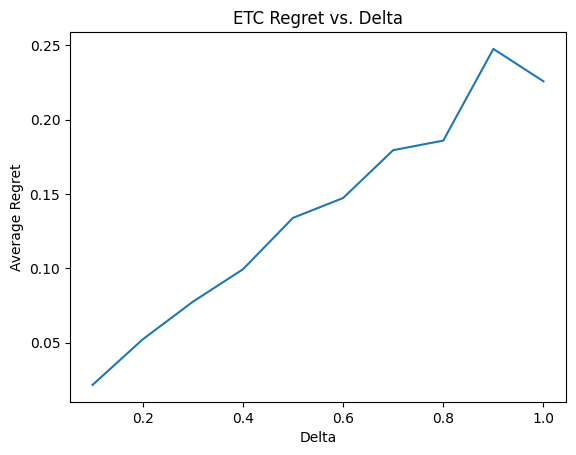

In [5]:
import matplotlib.pyplot as plt

deltas = [i/10 for i in range(1, 11)]
avg_regrets = []

for delta in deltas:
    avg_regret = 0
    for i in range(100):
        regret = etc(T=1000, delta=delta, n_arms=5, exploration_rounds=100)
        avg_regret += regret
    avg_regret /= 100
    avg_regrets.append(avg_regret)

plt.plot(deltas, avg_regrets)
plt.xlabel('Delta')
plt.ylabel('Average Regret')
plt.title('ETC Regret vs. Delta')
plt.show()


So, here we see that as delta increases, ETC becomes more conservative and explores less, which results of higher regret. 
P.S. Instead of 10^5  reruns we use 100 because execution takes too long if higher value is provided.


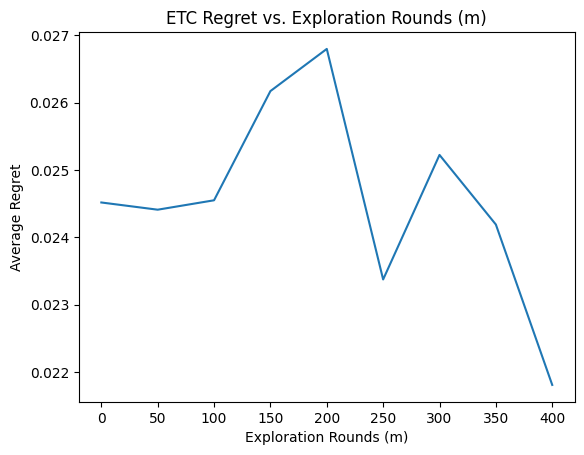

In [6]:
delta = 0.1
T = 2000
ms = [i for i in range(0, 401, 50)]
avg_regrets = []

for m in ms:
    avg_regret = 0
    for i in range(100):
        regret = etc(T=T, delta=delta, n_arms=5, exploration_rounds=m)
        avg_regret += regret
    avg_regret /= 100
    avg_regrets.append(avg_regret)

plt.plot(ms, avg_regrets)
plt.xlabel('Exploration Rounds (m)')
plt.ylabel('Average Regret')
plt.title('ETC Regret vs. Exploration Rounds (m)')
plt.show()


From the graph we see that the optimal value for m lies somewhere between 200 and 350 for the given values of T and delta.
P.S. Instead of 10^5  reruns we use 100 because execution takes too long if higher value is provided.

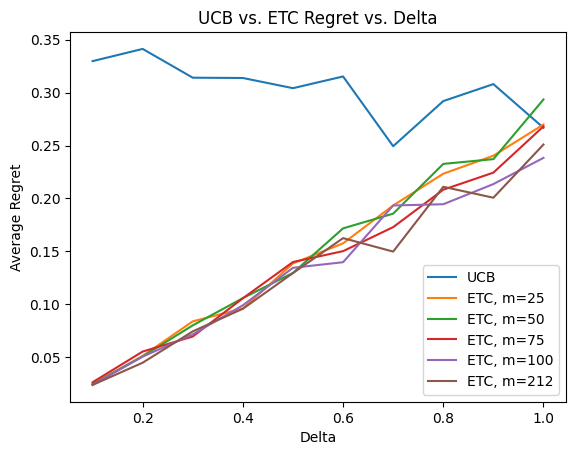

In [7]:
# UCB
deltas = [i/10 for i in range(1, 11)]

avg_ucb_regrets = []

for delta in deltas:
    avg_regret = 0
    for i in range(100):
        regret = ucb(T=1000, delta=delta, n_arms=5)
        avg_regret += regret
    avg_regret /= 100
    avg_ucb_regrets.append(avg_regret)

# ETC with different values of m
ms = [25, 50, 75, 100, 212]
avg_etc_regrets = []

for m in ms:
    avg_regrets = []
    for delta in deltas:
        avg_regret = 0
        for i in range(100):
            regret = etc(T=1000, delta=delta, n_arms=5, exploration_rounds=m)
            avg_regret += regret
        avg_regret /= 100
        avg_regrets.append(avg_regret)
    avg_etc_regrets.append(avg_regrets)

# Plot
plt.plot(deltas, avg_ucb_regrets, label='UCB')
for i, m in enumerate(ms):
    plt.plot(deltas, avg_etc_regrets[i], label=f'ETC, m={m}')
plt.legend()
plt.xlabel('Delta')
plt.ylabel('Average Regret')
plt.title('UCB vs. ETC Regret vs. Delta')
plt.show()


As we can see, The etc algorithm tends to perform better in this specific scenario than the ucb algorithm.

This could be because the etc initially explores all arms to get an idea of their rewards, while the ucb algorithm starts with only one arm and explores its subtrees recursively.

Also, instead of 10^5  reruns we use 100 because execution takes too long if higher value is provided.